<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/Book/Section%202.4%20Interest%20Rates/Section%202.4.2.1%20The%20Distribution%20of%20Changes%20in%20Interest%20Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Installing yfinance and arch...")
!pip install arch 1>/dev/null
!pip install yfinance 1>/dev/null
from yfinance import download
import pandas as pd
import numpy as np ;
import matplotlib.pyplot as pl
from statsmodels.base.model import GenericLikelihoodModel
from datetime import datetime
zero,one,two,three,five,ten,hundred=0e0,1e0,2e0,3e0,5e0,1e1,1e2 # some friendly numbers
half,GoldenRatio=one/two,(one+np.sqrt(five))/two

Installing yfinance and arch...


,Rate,Recession,Year
Date,,,
1954-01-04,1.33,True,1954
1954-01-05,1.28,True,1954
1954-01-06,1.28,True,1954
1954-01-07,1.31,True,1954
1954-01-08,1.31,True,1954
...,...,...,...
2023-03-14,4.71,False,2023
2023-03-15,4.59,False,2023
2023-03-16,4.57,False,2023


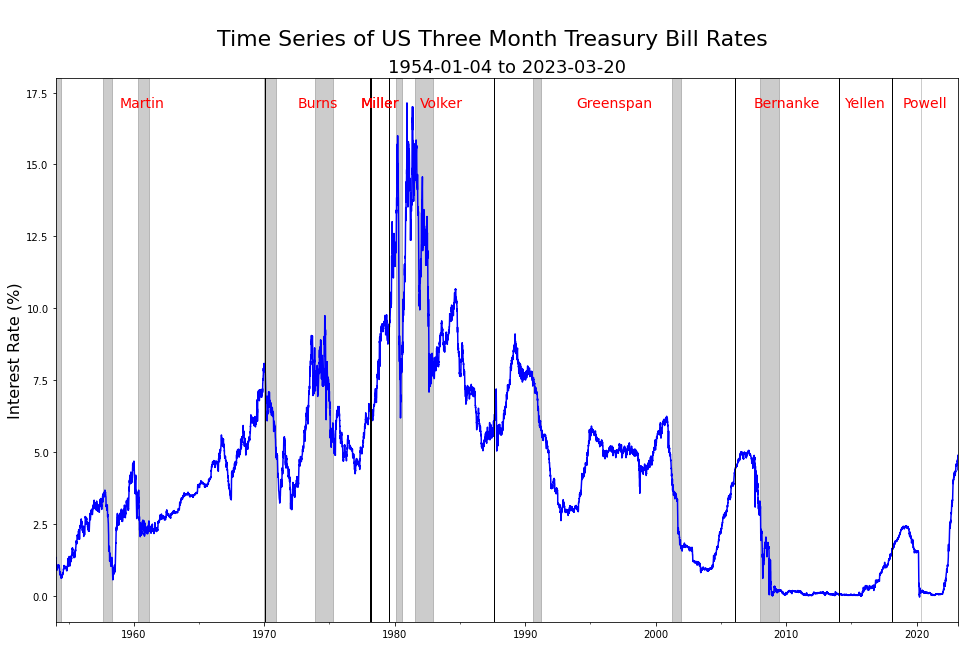

In [85]:
# get the bill rate data from Fred
DTB3=pd.read_table('https://fred.stlouisfed.org/data/DTB3.txt',skiprows=11,sep=r'\s+',header=0).rename(columns={"VALUE":"Rate","DATE":"Date"}).set_index("Date")
DTB3.index=pd.DatetimeIndex(DTB3.index).to_period('D')
DTB3['Rate']=DTB3['Rate'].apply(lambda x:float(x) if x!='.' else np.nan)

# join the recessions data (NBER data at Fred) 
USREC=pd.read_table('https://fred.stlouisfed.org/data/USREC.txt',skiprows=65,sep=r'\s+',header=0).rename(columns={"VALUE":"Recession","DATE":"Date"}).set_index("Date")
USREC.index=pd.DatetimeIndex(USREC.index).to_period('D')
DTB3=DTB3.merge(USREC,left_index=True,right_index=True,how='outer')
DTB3['Recession'].ffill(inplace=True)
DTB3['Recession']=DTB3['Recession'].apply(lambda x:True if x else False)
DTB3.dropna(inplace=True)
DTB3['Year']=DTB3.index.year
display(DTB3)

# Figure 2.14
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
figure.suptitle("\nTime Series of US Three Month Treasury Bill Rates",fontsize=22)
plot.set_title("%s to %s" % (min(DTB3.index),max(DTB3.index)),fontsize=18)
DTB3['Rate'].plot(ax=plot,color='blue')

recbe=list(DTB3.index[DTB3['Recession']!=DTB3['Recession'].shift()])

for b,e in [(k.asfreq(*'MS'),v.asfreq(*'ME')) for k,v in zip(recbe[:-2:2],recbe[1::2])]:
    plot.axvspan(b.to_timestamp(),e.to_timestamp(),color='black',alpha=0.2)

plot.axvspan(recbe[-1].asfreq(*'MS').to_timestamp(),recbe[-1].asfreq(*'ME').to_timestamp(),color='black',alpha=0.2) # above construct doesn't get the COVID recession

for c,b,e in ('Martin','1951-04-02','1970-01-31'),('Burns','1970-02-01','1978-01-31'),('Miller','1978-03-08','1979-08-06'),\
             ('Miller','1978-03-08','1979-08-06'),('Volker','1979-08-06','1987-08-11'),('Greenspan','1987-08-11','2006-01-31'),\
             ('Bernanke','2006-02-01','2014-01-31'),('Yellen','2014-02-03','2018-02-3'),('Powell','2018-02-05',datetime.now()):        
    plot.axvline(b,color='black',lw=1)
    plot.axvline(e,color='black',lw=1)
    m=pd.Timestamp(b)+pd.Timedelta(days=(pd.Timestamp(e)-pd.Timestamp(b)).days/two)

    if m<DTB3.index[0].to_timestamp():
        b=DTB3.index[0].to_timestamp()
        m=pd.Timestamp(b)+pd.Timedelta((pd.Timestamp(e)-pd.Timestamp(b)).days/two)

    elif m>DTB3.index[-1].to_timestamp():
        b=DTB3.index[-1].to_timestamp()
        m=pd.Timestamp(b)+pd.Timedelta((pd.Timestamp(e)-pd.Timestamp(b)).days/two)

    plot.text(m,17,c,fontsize=14,horizontalalignment='center',color='red')
    
plot.set_xlabel(None)
plot.set_ylabel('Interest Rate (%)',fontsize=16);

In [4]:
USREC[USREC.index>='1954-01-01'],DTB3[DTB3.index>='1954-01-01']

(            Recession
 Date                 
 1954-01-01          1
 1954-02-01          1
 1954-03-01          1
 1954-04-01          1
 1954-05-01          1
 ...               ...
 2022-10-01          0
 2022-11-01          0
 2022-12-01          0
 2023-01-01          0
 2023-02-01          0
 
 [830 rows x 1 columns],             Rate  Recession  Year
 Date                             
 1954-01-04  1.33       True  1954
 1954-01-05  1.28       True  1954
 1954-01-06  1.28       True  1954
 1954-01-07  1.31       True  1954
 1954-01-08  1.31       True  1954
 ...          ...        ...   ...
 2023-03-14  4.71      False  2023
 2023-03-15  4.59      False  2023
 2023-03-16  4.57      False  2023
 2023-03-17  4.36      False  2023
 2023-03-20  4.65      False  2023
 
 [17294 rows x 3 columns])